In [38]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # For plotly charts

# Define the strategy
def pivot_point_bounce_strategy(data):
    # Calculate daily pivot points
    data['PP'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['PP'] - data['Low']
    data['S1'] = 2 * data['PP'] - data['High']

    # Generate buy signals
    data['Signal'] = 0
    data.loc[(data['Close'] > data['PP']) & (data['Close'].shift(1) <= data['PP']), 'Signal'] = 1

    # Calculate hypothetical returns (assuming fixed position size)
    data['Returns'] = data['Close'].pct_change() * data['Signal'].shift(1)

    return data.round(4)

# Fetch TSLA data
ticker = " EURUSD=X"
#ticker = "TSLA"

data = yf.download(ticker, period="5y")

# Apply the strategy
data = pivot_point_bounce_strategy(data.copy())

df = data    


# Print key performance metrics
print("Hypothetical Strategy Performance:")
print("Total Return:", (data['Returns'] + 1).prod() - 1)
print("Sharpe Ratio:", data['Returns'].mean() / data['Returns'].std() * np.sqrt(252))
print("Max Drawdown:", (data['Returns'].cumsum() + 1).rolling(window=252).min() - 1)


# Print Data
display(data)



[*********************100%***********************]  1 of 1 completed
Hypothetical Strategy Performance:
Total Return: -0.4682780129434848
Sharpe Ratio: -4.102939758031934
Max Drawdown: Date
2019-01-21       NaN
2019-01-22       NaN
2019-01-23       NaN
2019-01-24       NaN
2019-01-25       NaN
               ...  
2024-01-15   -0.6292
2024-01-16   -0.6292
2024-01-17   -0.6292
2024-01-18   -0.6292
2024-01-19   -0.6292
Name: Returns, Length: 1304, dtype: float64


,Open,High,Low,Close,Adj Close,Volume,PP,R1,S1,Signal,Returns
Date,,,,,,,,,,,
2019-01-21,1.1365,1.1388,1.1358,1.1366,1.1366,0,1.1371,1.1383,1.1353,0,NaN
2019-01-22,1.1370,1.1375,1.1337,1.1369,1.1369,0,1.1360,1.1384,1.1346,0,0.0000
2019-01-23,1.1364,1.1393,1.1352,1.1364,1.1364,0,1.1370,1.1388,1.1346,0,-0.0000
2019-01-24,1.1387,1.1393,1.1313,1.1388,1.1388,0,1.1365,1.1417,1.1337,1,0.0000
2019-01-25,1.1310,1.1412,1.1306,1.1313,1.1313,0,1.1344,1.1381,1.1276,0,-0.0066
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,1.0946,1.0959,1.0934,1.0946,1.0946,0,1.0946,1.0958,1.0934,0,-0.0000
2024-01-16,1.0946,1.0947,1.0867,1.0946,1.0946,0,1.0920,1.0973,1.0893,0,0.0000
2024-01-17,1.0879,1.0885,1.0845,1.0879,1.0879,0,1.0870,1.0894,1.0854,0,-0.0000


In [39]:
# Add Columns for Balance, Profit, Unit Size, Delta, Change, Range, Shares 


# start_balance = 10,000
start_balance = 10000

# Profit = df['Returns']*1000 
df ['Profit'] = df['Returns'].round(2)*10000

# cum_profit = df['Profit'].cumsum()
cum_profit = df['Profit'].cumsum()

# Balance = cum_profit + start_balance
df['Balance'] = df['Profit'].cumsum() + 10000
# Range = df['high'] - df['low']
# Change = df['close'] - df['open']
# Shares = 1000 

display (df)
# 

,Open,High,Low,Close,Adj Close,Volume,PP,R1,S1,Signal,Returns,Profit,Balance
Date,,,,,,,,,,,,,
2019-01-21,1.1365,1.1388,1.1358,1.1366,1.1366,0,1.1371,1.1383,1.1353,0,NaN,NaN,NaN
2019-01-22,1.1370,1.1375,1.1337,1.1369,1.1369,0,1.1360,1.1384,1.1346,0,0.0000,0.0,10000.0
2019-01-23,1.1364,1.1393,1.1352,1.1364,1.1364,0,1.1370,1.1388,1.1346,0,-0.0000,-0.0,10000.0
2019-01-24,1.1387,1.1393,1.1313,1.1388,1.1388,0,1.1365,1.1417,1.1337,1,0.0000,0.0,10000.0
2019-01-25,1.1310,1.1412,1.1306,1.1313,1.1313,0,1.1344,1.1381,1.1276,0,-0.0066,-100.0,9900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,1.0946,1.0959,1.0934,1.0946,1.0946,0,1.0946,1.0958,1.0934,0,-0.0000,-0.0,5000.0
2024-01-16,1.0946,1.0947,1.0867,1.0946,1.0946,0,1.0920,1.0973,1.0893,0,0.0000,0.0,5000.0
2024-01-17,1.0879,1.0885,1.0845,1.0879,1.0879,0,1.0870,1.0894,1.0854,0,-0.0000,-0.0,5000.0


In [40]:
# Filter rows where 'Returns' is not equal to zero
df_filtered = df[df['Profit'] != 0]

# Filter out columns 'A' and 'B'
# df_filtered = df.drop(columns=['Adj Close', 'Volume','R1'])

# Print the filtered DataFrame
display(df_filtered)

,Open,High,Low,Close,Adj Close,Volume,PP,R1,S1,Signal,Returns,Profit,Balance
Date,,,,,,,,,,,,,
2019-01-21,1.1365,1.1388,1.1358,1.1366,1.1366,0,1.1371,1.1383,1.1353,0,NaN,NaN,NaN
2019-01-25,1.1310,1.1412,1.1306,1.1313,1.1313,0,1.1344,1.1381,1.1276,0,-0.0066,-100.0,9900.0
2019-02-14,1.1264,1.1308,1.1251,1.1265,1.1265,0,1.1275,1.1299,1.1241,0,-0.0062,-100.0,9800.0
2019-03-21,1.1430,1.1440,1.1355,1.1428,1.1428,0,1.1408,1.1460,1.1375,1,0.0064,100.0,9900.0
2019-08-01,1.1072,1.1073,1.1028,1.1072,1.1072,0,1.1057,1.1087,1.1042,0,-0.0077,-100.0,9800.0
2019-09-26,1.0952,1.0967,1.0925,1.0953,1.0953,0,1.0948,1.0972,1.0930,0,-0.0058,-100.0,9700.0
2019-12-16,1.1125,1.1158,1.1123,1.1124,1.1124,0,1.1135,1.1147,1.1113,0,-0.0055,-100.0,9600.0
2020-03-30,1.1135,1.1138,1.1012,1.1139,1.1139,0,1.1096,1.1181,1.1055,1,0.0082,100.0,9700.0
2020-03-31,1.1028,1.1044,1.0930,1.1030,1.1030,0,1.1001,1.1073,1.0959,0,-0.0098,-100.0,9600.0


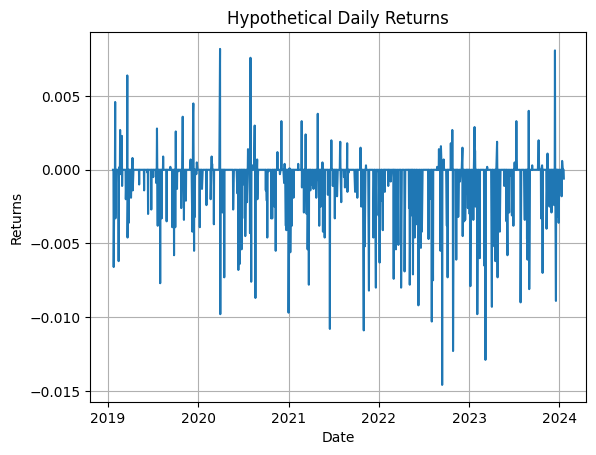

In [41]:

# Create the line chart
sns.lineplot(x="Date", y="Returns", data=df)

# Customize the plot
plt.title("Hypothetical Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid(True)

# Show the plot
plt.show()

In [42]:
descriptive_stats = df["Returns"].describe()
print(descriptive_stats)


count    1303.000000
mean       -0.000483
std         0.001868
min        -0.014600
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.008200
Name: Returns, dtype: float64


In [43]:
import pandas as pd

def calculate_sharpe_ratio(returns, risk_free_rate=0):
  """
  Calculates the Sharpe Ratio of a Pandas Series of returns.

  Args:
    returns: A Pandas Series of asset returns.
    risk_free_rate: The risk-free rate of return (default is 0).

  Returns:
    The Sharpe Ratio of the asset returns.
  """

  excess_returns = returns - risk_free_rate
  std_dev = excess_returns.std()
  sharpe_ratio = excess_returns.mean() / std_dev
  return sharpe_ratio

# Example usage
returns = pd.Series(df['Returns'])
sharpe_ratio = calculate_sharpe_ratio(returns)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: -0.26
